In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

population_data = pd.read_csv('world_population_by_country.csv')
population_data.rename(columns={"Yearly Change":"Yearly Change %"}, inplace=True)
population_data


,no,Country (or dependency),Population 2020,Yearly Change %,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,"1,439,323,776",0.39%,"5,540,090",153,"9,388,211","-348,399",1.7,38,61%,18.47%
1,2,India,"1,380,004,385",0.99%,"13,586,631",464,"2,973,190","-532,687",2.2,28,35%,17.70%
2,3,United States,"331,002,651",0.59%,"1,937,734",36,"9,147,420","954,806",1.8,38,83%,4.25%
3,4,Indonesia,"273,523,615",1.07%,"2,898,047",151,"1,811,570","-98,955",2.3,30,56%,3.51%
4,5,Pakistan,"220,892,340",2.00%,"4,327,022",287,"770,880","-233,379",3.6,23,35%,2.83%
...,...,...,...,...,...,...,...,...,...,...,...,...
230,231,Montserrat,"4,992",0.06%,3,50,100,NaN,N.A.,N.A.,10%,0.00%
231,232,Falkland Islands,"3,480",3.05%,103,0,"12,170",NaN,N.A.,N.A.,66%,0.00%
232,233,Niue,"1,626",0.68%,11,6,260,NaN,N.A.,N.A.,46%,0.00%
233,234,Tokelau,"1,357",1.27%,17,136,10,NaN,N.A.,N.A.,0%,0.00%


In [82]:
#Data cleaning
population_data = population_data[(population_data['Fert. Rate'].str.contains('N\.A\.') == False) & (population_data['Med. Age'].str.contains('N\.A\.') == False) & (population_data['Urban Pop %'].str.contains('N\.A\.') == False)]
population_data.dropna(inplace = True)
# population_data['Land Area (Km²)']= population_data['Land Area (Km²)'].str.replace(",","").astype(int)
population_data['Population 2020']= population_data['Population 2020'].str.replace(",","").astype(int)
population_data['Yearly Change %'] = population_data['Yearly Change %'].str.replace("%", "").astype(float)
population_data['Net Change']= population_data['Net Change'].str.replace(",","").astype(int)
population_data[population_data.columns[5]]= population_data[population_data.columns[5]].str.replace(",","").astype(int)
population_data[population_data.columns[6]]= population_data[population_data.columns[6]].str.replace(",","").astype(int)
population_data['Migrants (net)']= population_data['Migrants (net)'].str.replace(",","").astype(int)
population_data['Fert. Rate']= population_data['Fert. Rate'].astype(float)
population_data['Med. Age']= population_data['Med. Age'].astype(int)
population_data['Urban Pop %']= population_data['Urban Pop %'].str.replace("%","").astype(int)
population_data['World Share']= population_data['World Share'].str.replace("%","").astype(float)

population_data


C:\Users\ChairmanTee\AppData\Local\Temp\ipykernel_24220\3271446433.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_data.dropna(inplace = True)
C:\Users\ChairmanTee\AppData\Local\Temp\ipykernel_24220\3271446433.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_data['Population 2020']= population_data['Population 2020'].str.replace(",","").astype(int)
C:\Users\ChairmanTee\AppData\Local\Temp\ipykernel_24220\3271446433.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

,no,Country (or dependency),Population 2020,Yearly Change %,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,1439323776,0.39,5540090,153,9388211,-348399,1.7,38,61,18.47
1,2,India,1380004385,0.99,13586631,464,2973190,-532687,2.2,28,35,17.70
2,3,United States,331002651,0.59,1937734,36,9147420,954806,1.8,38,83,4.25
3,4,Indonesia,273523615,1.07,2898047,151,1811570,-98955,2.3,30,56,3.51
4,5,Pakistan,220892340,2.00,4327022,287,770880,-233379,3.6,23,35,2.83
...,...,...,...,...,...,...,...,...,...,...,...,...
196,197,Aruba,106766,0.43,452,593,180,201,1.9,41,44,0.00
197,198,Tonga,105695,1.15,1201,147,720,-800,3.6,22,24,0.00
198,199,U.S. Virgin Islands,104425,-0.15,-153,298,350,-451,2.0,43,96,0.00
199,200,Seychelles,98347,0.62,608,214,460,-200,2.5,34,56,0.00


In [83]:
feature_cols = population_data.columns.tolist()
feature_cols.remove('no')
feature_cols.remove('Fert. Rate')
feature_cols.remove('Country (or dependency)')
feature_cols

df_x = population_data[feature_cols]
df_y = population_data['Fert. Rate']
    


In [84]:
linreg = linear_model.LinearRegression()

In [85]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.25, random_state=0)

In [86]:
linreg.fit(x_train, y_train)

LinearRegression()

In [87]:
y_pred = linreg.predict(x_test)
mean_absolute_error(y_test, y_pred)

0.41012327681573574

In [88]:
y_pred

array([4.13551053, 2.30475546, 2.35021926, 1.68633814, 3.02778007,
       1.29920211, 0.92927596, 1.06153936, 3.46325408, 2.60649252,
       2.26529711, 4.23720212, 4.2757592 , 3.79596863, 4.08141028,
       4.28862029, 1.57415089, 3.69946628, 2.30949953, 4.63556349,
       1.42230111, 2.69639128, 2.43642716, 3.47202718, 3.18975756,
       3.88504554, 2.24953257, 4.58412028, 0.77686782, 3.05400773,
       2.68629236, 2.64516906, 2.01470185, 3.94182149, 2.09048944,
       2.489301  , 1.22353381, 2.37962699, 4.14158899, 1.09286367,
       2.17936889, 4.346311  , 1.68989111, 1.88401951, 3.05642516,
       4.01115614, 4.06296285, 4.39792938, 0.80508416])

In [89]:
y_test

116    4.5
191    2.3
57     2.2
90     1.9
12     2.6
37     1.4
18     1.6
129    1.4
169    2.4
7      2.1
5      1.7
126    4.6
165    4.4
182    3.4
75     4.1
33     4.4
183    1.6
187    4.4
189    1.4
72     6.1
154    1.6
160    2.8
184    2.0
110    3.0
135    2.9
186    3.7
185    2.0
45     4.9
22     1.3
159    2.8
99     3.0
44     2.0
125    1.9
4      3.6
62     1.7
200    2.0
93     1.5
175    1.8
26     3.5
56     1.2
168    1.5
143    5.3
8      1.8
133    2.0
146    3.2
67     2.8
94     3.6
61     4.3
150    1.7
Name: Fert. Rate, dtype: float64

Feature: Population 2020, Score: 1.6535318052409833e-07
Feature: Yearly Change %, Score: 0.5183404279442639
Feature: Net Change, Score: 6.893262571860959e-08
Feature: Density  (P/Km²), Score: -0.00043146806761836654
Feature: Land Area (Km²), Score: 2.141934679622537e-08
Feature: Migrants (net), Score: -5.631079393730171e-07
Feature: Med. Age, Score: -0.05918393485308837
Feature: Urban Pop %, Score: -0.005235218976168325
Feature: World Share, Score: -12.961216195101988


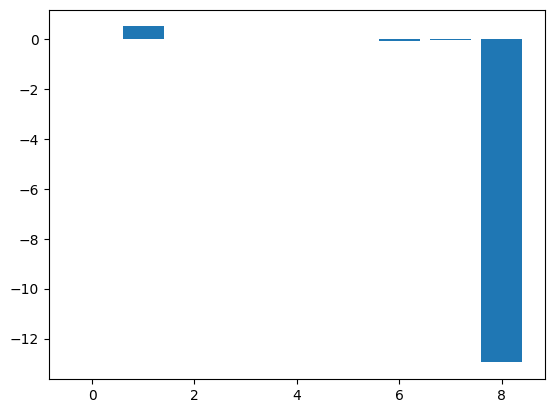

In [90]:
feature_importance = linreg.coef_
for i,v in enumerate(feature_importance):
    print('Feature: {}, Score: {}'.format(feature_cols[i],v))

plt.bar([x for x in range(len(feature_importance))], feature_importance)
plt.show()